In [1]:
#sgd15.1.2 Protected Areas by LCM by region 

In [2]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point
import numpy as np
import geopandas as gpd
from glob import glob
import fiona
from scipy.spatial import distance_matrix
import math
from scipy.spatial import distance
#from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import ball_tree
from shapely.ops import nearest_points

In [4]:
#reading geodatabase files
import fiona
fiona.listlayers('R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\PAsInLCM15\Data\PAdissolve.gdb')
#paDissolve = gpd.read_file("R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\PAsInLCM15\Data\PAdissolve.gdb", driver='FILEGDB', layer=0)

['wdpa03uk_dissolve',
 'wdpa07uk_dissolve',
 'wdpa11uk_dissolve',
 'wdpa15uk_dissolve',
 'wdpa19uk_dissolve',
 'wdpa99uk_dissolve']

In [3]:
#define data path
ukregions = r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Data\ukRegions_Dec19BFC.shp'
pas = r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Data\WDPA19uk_TerrNoSCIfinal.shp'
#lcm15 = r''

In [4]:
#reading geodatabase files
import fiona
fiona.listlayers('Q:\Authoritative_Datasets\Land_Cover_Maps\LCM_2015_GB_NI.gdb')
#lcm15gb = gpd.read_file("Q:\Authoritative_Datasets\Land_Cover_Maps\LCM_2015_GB_NI.gdb", driver='FILEGDB', layer=0)

['LCM_2015_GB_Vector_BNG', 'LCM_2015_NI_Vector_BNG', 'LCM_2015_NI_Vector_IG']

In [5]:
#reading lcm15 files from gdb
lcm15gb = gpd.read_file("Q:\Authoritative_Datasets\Land_Cover_Maps\LCM_2015_GB_NI.gdb", driver='FILEGDB', layer=0)
lcm15ni = gpd.read_file("Q:\Authoritative_Datasets\Land_Cover_Maps\LCM_2015_GB_NI.gdb", driver='FILEGDB', layer=1)

In [6]:
#define geodataframes using geopandas fr regions and protected areas datasets
ukrgn_gdf = gpd.read_file(ukregions)
pas_gdf = gpd.read_file(pas)

In [7]:
#check data if correct and also check crs
#ukrgn_gdf.plot()
#plt.show()
#ukrgn_gdf.crs

In [8]:
#check data if correct and also check crs
#pas_gdf.plot()
#plt.show()
#pas_gdf.crs

In [9]:
#check data if correct and also check crs
#lcm15gb.plot()
#plt.show()
#lcm15gb.crs

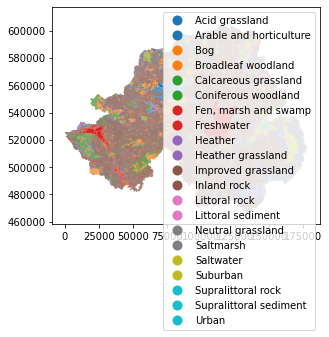

In [10]:
#check data if correct and also check crs
lcm15ni.plot(column="bhab", legend=True)
plt.show()
#lcm15ni.crs

In [11]:
# overlay protected areas with lCM by using intersect - northern ireland
#pas_lcm15ni = gpd.overlay(lcm15ni, pas_gdf, how='intersection')
#pas_lcm15ni.head
#pas_lcm15ni.to_file(r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15ni.shp')

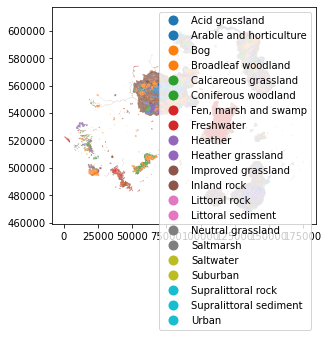

In [12]:
pas_lcm15ni = gpd.read_file(r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15ni.shp')
#pas_lcm15ni.head
pas_lcm15ni.plot(column="bhab", legend=True)
plt.show()

In [13]:
#pas_lcm15ni2.columns# overlay protected areas with lCM by using intersect


In [14]:
#lcm15gb.head()

In [15]:
#select wales from lcm data by filtering
lcm15wal = lcm15gb[lcm15gb.CTRY19CD == 'W92000004']
#lcm15wal.plot(column="bhab")
#plt.show()

# overlay protected areas with lCM by using intersect - wales
pas_lcm15wal = gpd.overlay(lcm15wal, pas_gdf, how='intersection') 
pas_lcm15wal.to_file(r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15wal.shp')

<ipython-input-15-b2bea8376741>:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pas_lcm15wal.to_file(r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15wal.shp')


DriverIOError: Failed to create file R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15wal.shp: No such file or directory

In [ ]:
# overlay protected areas with lCM by using intersect - England

#select England from lcm data by filtering
lcm15eng = lcm15gb[lcm15gb.CTRY19CD == 'E92000001']
#lcm15eng.plot(column="bhab")
#plt.show()

pas_lcm15eng = gpd.overlay(lcm15eng, pas_gdf, how='intersection') 
pas_lcm15eng.to_file(r'R:\ROBERT\SDGs\SDG15\GOAL1512\QA1512\Intermediates\pas_lcm15eng.shp')